In [1]:
#importing required libraries
import tensorflow as tf
import numpy as np

In [2]:
#By default tensorflow enabled eager execution
#To check eager excution statues you can execute below statement
tf.executing_eagerly()

True

In [3]:
a = tf.constant(23)
b = tf.constant(25)
a+b

<tf.Tensor: id=2, shape=(), dtype=int32, numpy=48>

In [4]:
#tf.functio decoratoe will used to execute operations in form of graph(AutoGraph)
@tf.function
def add_fc(a,b):
    return tf.add(a,b)

In [5]:
add_fc(a,b)

<tf.Tensor: id=14, shape=(), dtype=int32, numpy=48>

In [6]:
#code generated by Autograph
def add(a,b):
    return tf.add(a,b)
print(tf.autograph.to_code(add))

from __future__ import print_function

def tf__add(a, b):
  try:
    with ag__.function_scope('add'):
      do_return = False
      retval_ = None
      do_return = True
      retval_ = ag__.converted_call('add', tf, ag__.ConversionOptions(recursive=True, verbose=0, strip_decorators=(ag__.convert, ag__.do_not_convert, ag__.converted_call), force_conversion=False, optional_features=ag__.Feature.ALL, internal_convert_user_code=True), (a, b), {})
      return retval_
  except:
    ag__.rewrite_graph_construction_error(ag_source_map__)



tf__add.autograph_info__ = {}



# image Classification

In [7]:
# Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# Ohter import
import sys

In [8]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


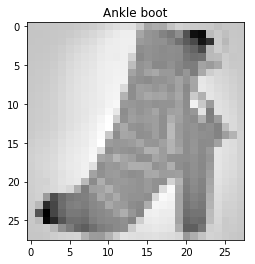

In [9]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

In [10]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.12232511 0.01094298 0.13448983 0.1456801  0.10949897 0.01578672
  0.0236354  0.04716917 0.05059893 0.33987284]] [9]


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  200960    
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [13]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 205us/sample - loss: 1.7538 - accuracy: 0.4310 - val_loss: 1.2699 - val_accuracy: 0.6110
Epoch 2/10
8000/8000 [==============================] - 1s 122us/sample - loss: 1.0797 - accuracy: 0.6802 - val_loss: 0.9787 - val_accuracy: 0.6915
Epoch 3/10
8000/8000 [==============================] - 1s 122us/sample - loss: 0.8801 - accuracy: 0.7286 - val_loss: 0.8497 - val_accuracy: 0.7220
Epoch 4/10
8000/8000 [==============================] - 1s 121us/sample - loss: 0.7781 - accuracy: 0.7517 - val_loss: 0.7754 - val_accuracy: 0.7410
Epoch 5/10
8000/8000 [==============================] - 1s 126us/sample - loss: 0.7141 - accuracy: 0.7671 - val_loss: 0.7258 - val_accuracy: 0.7560
Epoch 6/10
8000/8000 [==============================] - 1s 132us/sample - loss: 0.6689 - accuracy: 0.7795 - val_loss: 0.6893 - val_accuracy: 0.7655
Epoch 7/10
8000/8000 [==============================] - 1s 132us

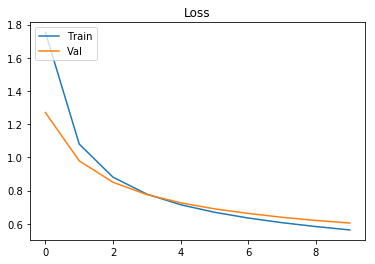

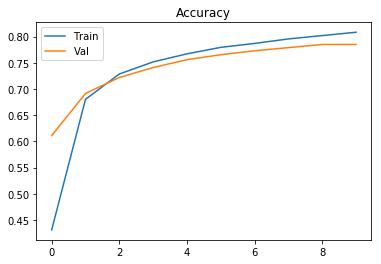

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [15]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.6259 - accuracy: 0.7845
Test Loss 0.6258852389335632
Test Accuracy 0.7845
